Loading the dataset

In [1]:
import pandas as pd
import numpy as np
dataset = pd.read_csv("train.csv")
X = dataset.iloc[:,1:]
Y = dataset.iloc[:,0]

Converting input to arrays

In [2]:
X = np.array(X)
Y = np.array(Y)

Normalizing/Scaling the input X

In [3]:
X = X/255.0

Visualizing the digits

In [4]:
import matplotlib.pyplot as plt
def plot_digits(A, B):
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.imshow(A[i].reshape((28, 28)), cmap='gray')
        plt.title('{}'.format(B[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()

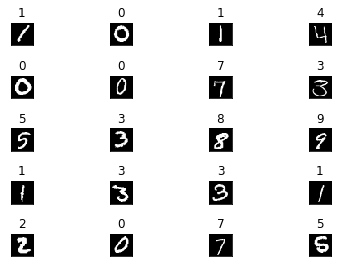

In [5]:
plot_digits(X,Y)

Split the dataset into Training and Testing sets

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.03, shuffle = True)

Defining the CNN Model

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
import warnings
warnings.filterwarnings("ignore")

model = Sequential()
model.add(Dense(300, input_dim = 784))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))


Summary of model

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
activation_1 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_3 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
__________

Building the CNN model

In [9]:
model.build()

Using the Adam Optimizer for the CNN

In [10]:
from keras.optimizers import Adam
adam = Adam(lr=5e-4)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

Training the model

In [11]:
T_train = keras.utils.to_categorical(Y_train, num_classes=10)
T_test = keras.utils.to_categorical(Y_test, num_classes=10)
model.fit(X_train, T_train, epochs=20, batch_size=100)

Epoch 1/20
40740/40740 [==============================] - 5s 127us/step - loss: 0.3845 - acc: 0.8869
Epoch 2/20
40740/40740 [==============================] - 5s 123us/step - loss: 0.1323 - acc: 0.9607
Epoch 3/20
40740/40740 [==============================] - 5s 123us/step - loss: 0.0932 - acc: 0.9720
Epoch 4/20
40740/40740 [==============================] - 6s 138us/step - loss: 0.0680 - acc: 0.9792
Epoch 5/20
40740/40740 [==============================] - 4s 104us/step - loss: 0.0493 - acc: 0.9843
Epoch 6/20
40740/40740 [==============================] - 5s 113us/step - loss: 0.0419 - acc: 0.9864
Epoch 7/20
40740/40740 [==============================] - 4s 95us/step - loss: 0.0289 - acc: 0.9916
Epoch 8/20
40740/40740 [==============================] - 4s 110us/step - loss: 0.0254 - acc: 0.9913
Epoch 9/20
40740/40740 [==============================] - 5s 129us/step - loss: 0.0224 - acc: 0.9925
Epoch 10/20
40740/40740 [==============================] - 4s 109us/step - loss: 0.0213 - ac

In [12]:
score = model.evaluate(X_test, T_test, batch_size=100)
score

1260/1260 [==============================] - 0s 102us/step


[0.07175574288333929, 0.981746044423845]

Running the CNN model on test data

Loading test data

In [13]:
test_data = pd.read_csv("test.csv")
test_set = np.array(test_data)

Normalizing/Scaling the test data

In [14]:
test_set = test_set/255

Predicting values for test set

In [15]:
T_pred = model.predict(test_set)

Setting label values

In [16]:
Y_pred = np.argmax(T_pred, axis=1)
prediction_set = pd.read_csv("sample_submission.csv")
prediction_set['Label'] = Y_pred

Viewing subset of predictions

In [17]:
prediction_set.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


Casting sample submission into final output file

In [18]:
prediction_set.to_csv("out.csv",index = False)